In [1]:
!python --version

Python 3.7.6


In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
import keras

In [5]:
import tensorflow as tf

In [6]:
tf.__version__ # 1.1 in tutorial

'2.3.1'

In [12]:
import kaggle_data
#from kaggle_data import load_data, preprocess_data, preproess_labels

In [14]:
X_train, labels = kaggle_data.load_data('data/kaggle_ottogroup/train.csv', train = True)

AttributeError: module 'kaggle_data' has no attribute 'load_data'

In [ ]:
# Looks like I can't get the data lol
#Y_train is one-hot encoded
# Skipping 'With Theano' section
# Theano (predates DL era) is like tf, but can assume they're the same for this tutorial
# not intuitive to do the Logistic Regression (NN 1-layer and sigmoid implementation) in this syntax


In [16]:
nb_classes = y_train.shape[1]
dims = X_train.shape[1]
# Parameters
learning_rate = 0.01
training_epochs = 25
display_step = 1

NameError: name 'y_train' is not defined

In [ ]:
# tf Graph input
x = tf.placeholder('float', [None, dims])
y = tf.placeholder('float', [None, nb_classes])

In [ ]:
# Construct (linear) model
with tf.name_scope('model') as scope:
    W = tf.Variable(tf.zeros([dims, nb_classes]))
    b = tf.Variable(tf.zeros([nb_classes]))
    activation = tf.nn.softmax(tf.matmul(x, W) + b)
    
    w_h = tf.summary.histogram('weights_histogram', W)
    b_h = tf.summary.histogram('biases_histogram', b)
    tf.summary.scalar('mean_weights', tf.reduce_mean(W))
    tf.summary.scalar('mean_bias', tf.reduce_mean(b))
    
# Minimize error using cross entropy
# Note: More name scopes will clean up graph representation
with tf.name_scope('cost_function'): as scope:
        cross_entropy = y*tf.log(activation)
        cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices = 1))
        tf.summary.scalar('cost_function', cost)
        tf.summary.histogram('cost_histogram', cost)
        
with tf.name_scope('train') as scope:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
#Accuracy
with tf.name_scope('Accuracy') as scope:
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    tf.summary.scalar('accuracy', accuracy)

In [ ]:
# Learning in a TF Session
LOGDIR = '/tmp/logistic_logs'
import os, shutil
if os.path.isdir(LOGDIR):
    shutil.rmtree(LOGDIR)
os.mkdir(LOGDIR)

# Plug TensorBoard Visualization
writer = tf.summary.FileWriter(LOGDIR, graph = tf.get_default_graph())

In [ ]:
for var in tf.get_collection(tf.GraphKeys.SUMMARIES):
    print(var.name)
    
summary_op = tf.summary.merge_all()
print('Summary Op: ' + summary_op)

In [17]:
# Launch the graph
with tf.Session() as session:
    # Initializing the vars
    session.run(tf.global_variables_initializer())
    
    cost_epochs = []
    # For batch, would do. a double loop
    for epoch in range(training_epochs):
        _, summary, c = session.run(fetches=[optimizer, summary_op, cost], feed_dict = {x:X_tra...})
        # Why fetch the optimizer if we won't use it?
        cost_epochs.append(c)
        writer.add_summary(summary = summary, global_step = epoch)
        print('accuracy epoch {}:{}'.format(epoch, accuracy.eval({x: X_train, y: Y_train})))
        
    print('Training phase finished')
    plt.plot(range(len(cost_epochs)), cost_epochs, 'o', label = 'yada')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    prediction = tf.argmax(activation, 1)
    print(prediction.eval({x: X_test}))

SyntaxError: invalid syntax (<ipython-input-17-45de4b50721b>, line 8)

In [ ]:
%%bash
python -m tensorflow.tensorboard --logdir=/tmp/logistic_logs
# The above gives, then edit url somehow and get TensorBoard (mean bias and weights by epoch, accuracy)
# includse a graph (like a flowchart) This is your compiled code

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
model = Sequential()  # Feed-Forward network
model.add(Dense(nb_classes, input_shape = (dims,), activation = 'sigmoid'))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, Y_train)

In [ ]:
# Keras adds pythonic interface onto TF
model.summary() # 846 trainable parameters
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

fBestModel = 'best_model.h5'
early_stop = EarlyStopping(monitor='val_loss', patience = 2, verbose = 1) # 2 consecutive steps with val_loss not changing (or not falling strictly?)
best_model = ModelCheckpoint(fBestModel, verbose = 0, save_best_only = True)
model.fit(X_train, Y_train, validation_data = (X_cal, Y_val), epochs = 50, batch_size = 128, verbose = True, callbacks = [best_model, early_stop])


In [ ]:
# Multi-Layer FC Networks
model = Sequential()
model.add(Dense(100, input_shape=(dims,)))
## Can add additional layers here
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss = 'categorical_crossentropy')
model.summary() # 10,309 trainable parameters
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 20, batch_size = 128, verbose = True)

In [19]:
#1.1 Keras Backend provides an abstraction over both Theano and TensorFlow
import keras.backend as k

In [ ]:
feats = dims
x = K.placeholder(dtype='float', shape=X_train.shape)
target = K.placeholder(dtype='float', shape=Y_train.shape)

W = K.variable(np.random.rand(dims, nb_classes))
b = k.variable(np.random.rand(nb_classes))

y = K.dot(x, W) + b
loss = K.categorical_crossentropy(y, target)
activation = K.softmax(y)
train = K.function(input=[x, target],...)

# etc. (this will work on either Theano or Tensorflow by changing the keras.json file
# each of which works different in memory allocation on the GPUs

In [44]:
# 2.0 MNIST Dataset
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
type(X_train)

numpy.ndarray

In [46]:
#2.1 Hidden Layer Representation and Embeddings
nb_classes = 10
#FC@512+relu -> FC@512+relu -> FC@nb_classes+softmax
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr = 0.001), \
              metrics = ['accuracy']) # or optimzize = 'sgd' for defaults


In [47]:
X_train.shape

(60000, 28, 28)

In [48]:
from keras.utils import np_utils

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

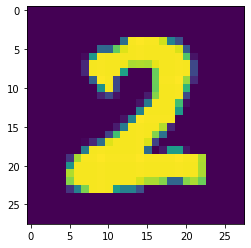

In [50]:
plt.imshow(X_train[0].reshape(28, 28))

In [53]:
# Training
network_history = model.fit(X_train, Y_train, batch_size = 128, epochs = 2, verbose = 1, validation_data = (X_val, Y_val))

Epoch 1/2
352/352 [==============================] - 3s 9ms/step - loss: 1.2359 - accuracy: 0.7771 - val_loss: 1.1419 - val_accuracy: 0.7881
Epoch 2/2
352/352 [==============================] - 3s 9ms/step - loss: 1.0664 - accuracy: 0.8004 - val_loss: 0.9938 - val_accuracy: 0.8093


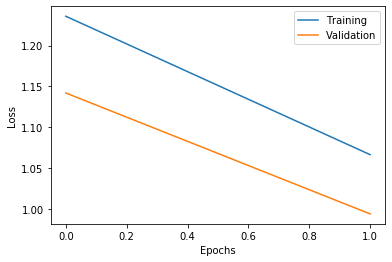

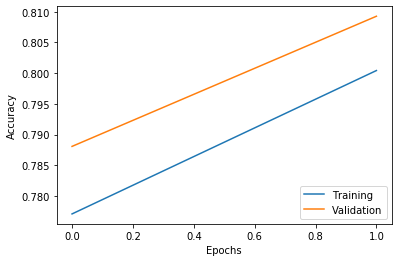

In [54]:
# I am not getting results like the tutorial, why does it only do 352? In tutorial it says 45000/45000.
# Plotting. Oh, 45000 batch_size, so maybe it's just choice. But still, my val_accuracy is much lower, but it gets better each time

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc = 'lower right')

plot_history(network_history)
    

In [55]:
# Introducing the Dropout Layer
# keras.layers.core.Dropout(rate, noise_shape = None, seed = None)
# rate is fraction of input units to drop
from keras.layers.core import Dropout
#Dropout?? to get the methods and their code
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr = 0.001), \
              metrics = ['accuracy']) # or optimzize = 'sgd' for defaults

In [56]:
network_history = model.fit(X_train, Y_train, batch_size = 128, epochs = 4, verbose = 1, validation_data = (X_val, Y_val))

Epoch 1/4
352/352 [==============================] - 4s 11ms/step - loss: 2.2485 - accuracy: 0.1742 - val_loss: 2.1115 - val_accuracy: 0.3499
Epoch 2/4
352/352 [==============================] - 4s 12ms/step - loss: 2.0355 - accuracy: 0.3878 - val_loss: 1.8951 - val_accuracy: 0.5869
Epoch 3/4
352/352 [==============================] - 4s 11ms/step - loss: 1.8274 - accuracy: 0.5428 - val_loss: 1.6735 - val_accuracy: 0.6756
Epoch 4/4
352/352 [==============================] - 5s 14ms/step - loss: 1.6164 - accuracy: 0.6289 - val_loss: 1.4541 - val_accuracy: 0.7318


In [ ]:
# Again, the tutorial starts out at much better accuracy... 0.8418 instad of 0.3499

In [57]:
# Inspecting Layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [58]:
# model.layers is iterable
print('Model Input Tensors: ', model.input, end = '\n\n')
print('Layers - Network Configuration', end = '\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end = '\n{}\n'.format('----'*10))
print('Model Output Tensors: ', model.output)

Model Input Tensors:  Tensor("dense_9_input:0", shape=(None, 784), dtype=float32)

Layers - Network Configuration

dense_9 True
Layer Configuration:
{'name': 'dense_9', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
----------------------------------------
dropout True
Layer Configuration:
{'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}
----------------------------------------
dense_10 True
Layer Configuration:
{'name': 'dense_10', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'c

In [59]:
# Extract hidden layer representation of the given data
model_truncated = Sequential()
model_truncated.add(Dense(512, activation = 'relu', input_shape = (784,)))
model_truncated.add(Dropout(0.2))
model_truncated.add(Dense(512, activation = 'relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())
    
model_truncated.compile(loss='categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy'])

In [60]:
np.all(model_truncated.layers[0].get_weights()[0] == model.layers[0].get_weights()[0])

True

In [64]:
hidden_features = model_truncated.predict(X_train)
from sklearn.manifold import TSNE
# projection of the data in an embedding layer
tsne = TSNE(n_components = 2)
X_tnse = tnse.fit_transform(hidden_features[:1000])

NameError: name 'tnse' is not defined

In [ ]:
colors_map = np.argmax(Y_train, axis = 1)
X_tsne.shape

In [ ]:
#Excercise Try a different alg. to create the manifold
from sklearn.manifold import MDS